# Mounting Google Drive

In [29]:
from google.colab import drive
drive.mount("/content/Drive")

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


# Imports

## Basic Imports

In [30]:
# DataFrame Manipulation, Linear Algebra
import pandas as pd
import numpy as np

# Plotting Library
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Machine Learning Imports

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Preprocessing

In [32]:
data = pd.read_csv("/content/Drive/MyDrive/Mall-Customer-Segmentation/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
# Dropping the CustomerId column
data.drop("CustomerID", axis=1, inplace=True)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Data Visualization

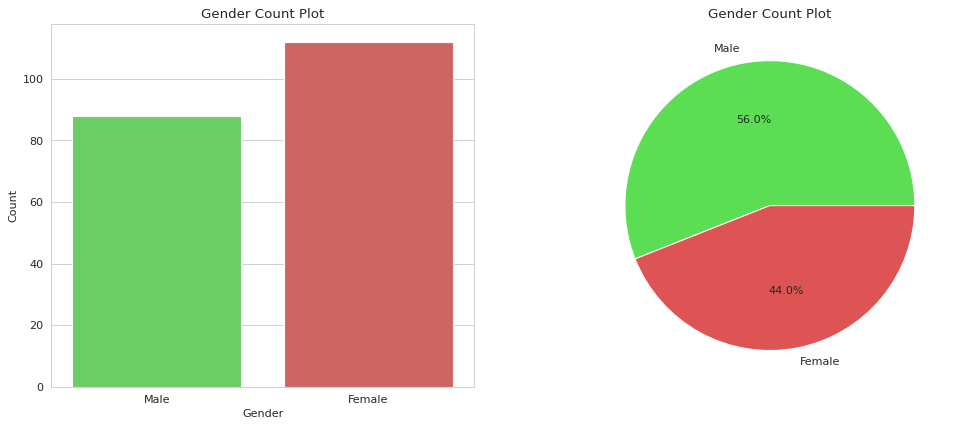

In [34]:
fig, axes = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)

sns.countplot(x="Gender", data=data, palette=['#5bde54',"#de5454"], ax=axes[0])
axes[0].set_title("Gender Count Plot")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(data["Gender"].unique())

plt.pie(data["Gender"].value_counts(), autopct='%.1f%%', labels=data["Gender"].unique(), colors=['#5bde54',"#de5454"])
axes[1].set_title("Gender Count Plot")

plt.show()

In [35]:
def distributon_plot(x):
    fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)

    sns.histplot(x=x, hue="Gender", data=data, palette=['#5bde54',"#de5454"], ax=axes[0])
    axes[0].set_title(f"{x} Distribution Histplot")
    axes[0].legend(data["Gender"].unique())
    axes[0].set_ylabel("Density / Count")

    sns.kdeplot(x=x, hue="Gender", data=data, palette=['#5bde54',"#de5454"], ax=axes[1])
    axes[1].set_title(f"{x} Distribution Kdeplot")
    axes[1].legend(data["Gender"].unique())
    axes[1].set_ylabel("Density / Count")

    plt.show()

def violin_plot(data, y):
    fig = px.violin(
        data,
        y = y,
        box = True,
        points = "all"
    )

    fig.update_layout(
        width=600,
        height=500,
        title=f"{y} Distribution Violin Plot",
        yaxis_title_text = y,
    )

    return fig

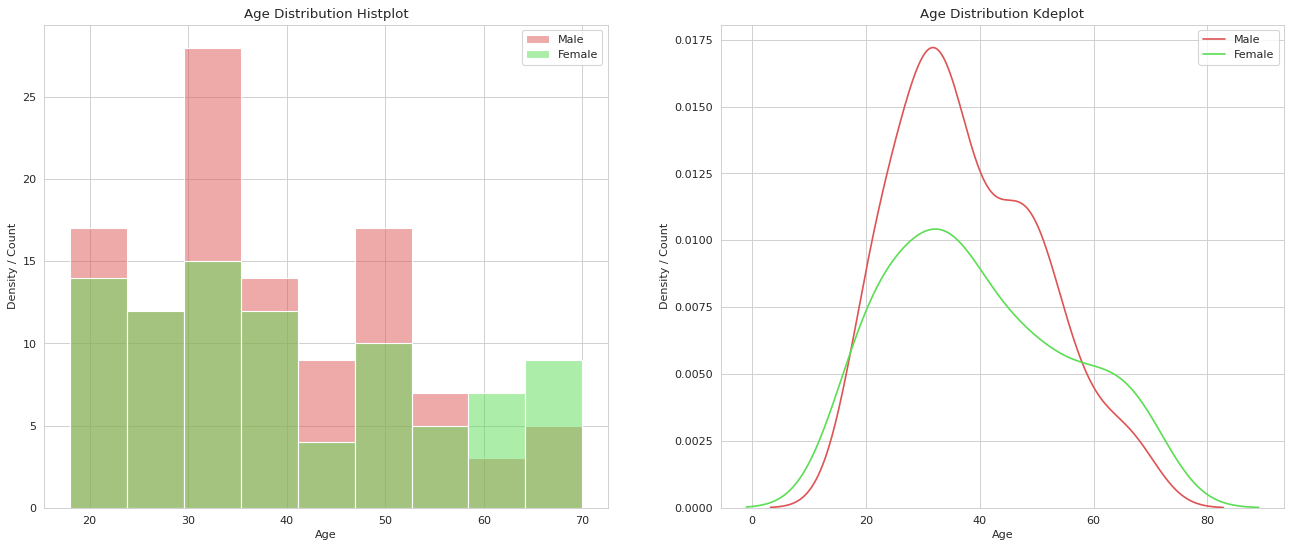

In [36]:
distributon_plot("Age")

In [37]:
violin_plot(data, "Age")

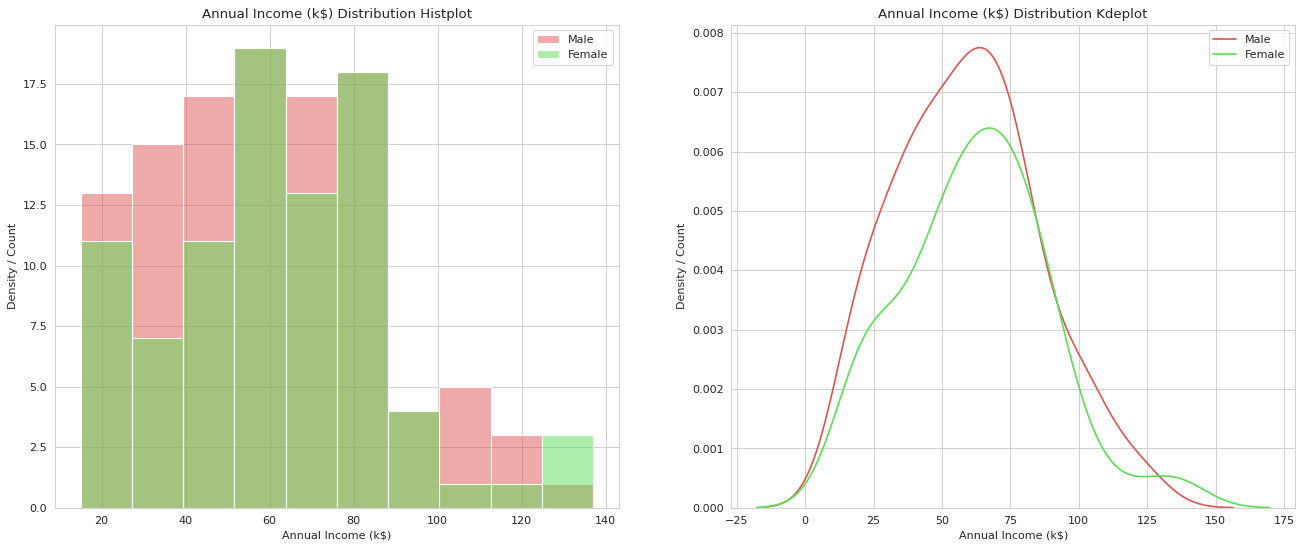

In [38]:
distributon_plot("Annual Income (k$)")

In [39]:
violin_plot(data, "Annual Income (k$)")

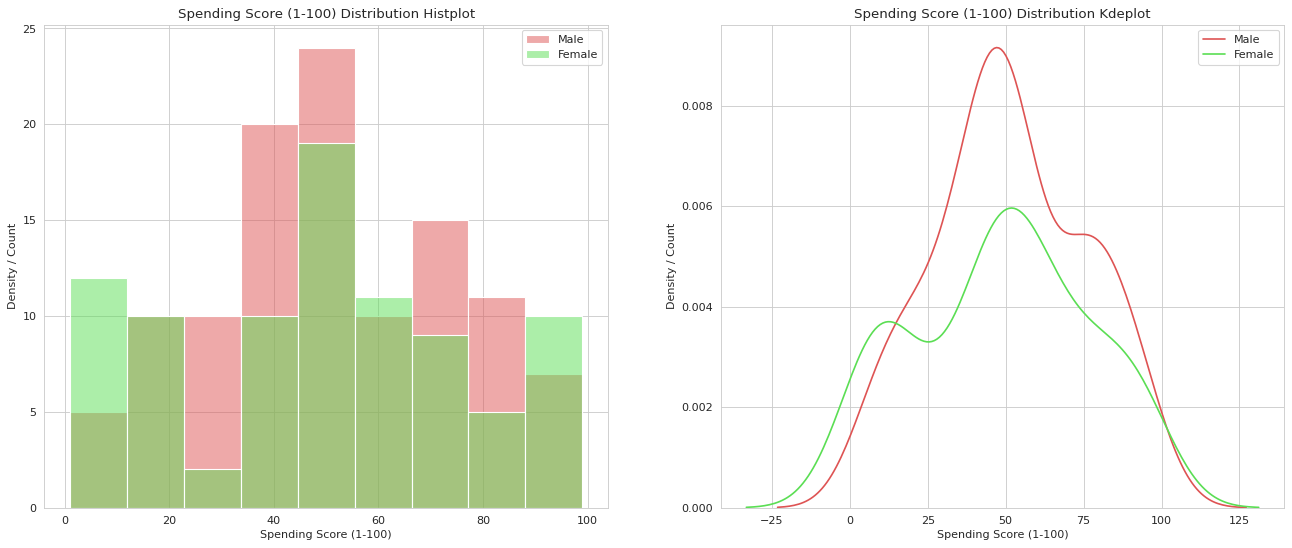

In [40]:
distributon_plot("Spending Score (1-100)")

In [41]:
violin_plot(data, "Spending Score (1-100)")

# Encoding

In [42]:
encoder = LabelEncoder()

data["Gender"] = encoder.fit_transform(data["Gender"])

gender_mapping = {index: label for index, label in enumerate(encoder.classes_)}
gender_mapping

{0: 'Female', 1: 'Male'}

In [43]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Correlation Heatmap

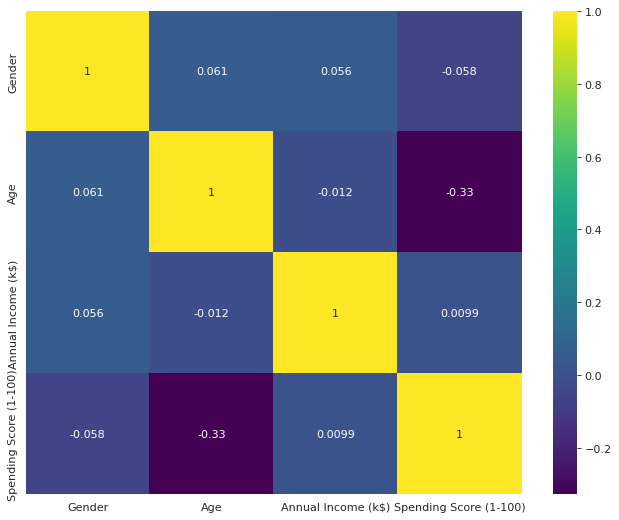

In [44]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["figure.dpi"] = 80
sns.heatmap(data.corr(), annot=True, cmap="viridis")
plt.show()

# Data Scaling

In [45]:
scaler = StandardScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# Custom Functions

In [46]:
def elbow_method(data, max_clusters=20):
    kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]

    inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

    fig = px.line(
        x = range(1, max_clusters),
        y = inertias,
        labels={
            'x':'No. Of Clusters',
            'y':'Inertia'
        },
        title="Choosing the Number of Clusters",
        width=500, height=500,
        markers=True
    )
    return fig

In [47]:
def get_kmeans_clusters(data, n_clusters, n_init):
    kmeans = KMeans(n_clusters=5, n_init=5)
    kmeans.fit(data)

    clusters = kmeans.predict(data)
    return [kmeans, clusters]

In [48]:
# This Custom PCA Supports upto 3 components
# As No Plotting possible >3 components
class CustomPCA():
    def __init__ (self, n_components, scaled_data):
        self.n_components = n_components
        self.scaled_data = scaled_data
        
        if self.n_components < 2: self.n_components = 2
        if self.n_components > 3: self.n_components = 3

        self.pca = PCA(n_components=self.n_components)
    
    def get_reduced_data(self):
        reduced_data = pd.DataFrame(
            self.pca.fit_transform(self.scaled_data),
            columns=[f"PC{i+1}" for i in range(self.n_components)]
        )
        reduced_data["cluster"] = clusters
        return reduced_data

    def get_reduced_centers(self, kmeans):
        reduced_centers = pd.DataFrame(
            self.pca.transform(kmeans.cluster_centers_),
            columns=["CenterX", "CenterY", "CenterZ"][:self.n_components])
        return reduced_centers

    def get_cluster_plot(self, reduced_data, reduced_centers, colors):
        cluster_traces = []

        if self.n_components == 2:
            for i in range(reduced_data["cluster"].nunique()):
                trace = go.Scatter(
                            x = reduced_data[reduced_data["cluster"] == i]["PC1"],
                            y = reduced_data[reduced_data["cluster"] == i]["PC2"],
                            mode = "markers",
                            name = f"Cluster {i+1}",
                            marker = dict(
                                color = colors.pop(0),
                                size = 10
                            ),
                        )
                cluster_traces.append(trace)

            trace = go.Scatter(
                        x = reduced_centers["CenterX"],
                        y = reduced_centers["CenterY"],
                        mode = "markers",
                        name = "Centroids",
                        marker = dict(
                            color = "#6F4C5B",
                            size = 15
                        )
                    )
            cluster_traces.append(trace)

        if self.n_components == 3:
            for i in range(reduced_data["cluster"].nunique()):
                trace = go.Scatter3d(
                            x = reduced_data[reduced_data["cluster"] == i]["PC1"],
                            y = reduced_data[reduced_data["cluster"] == i]["PC2"],
                            z = reduced_data[reduced_data["cluster"] == i]["PC3"],
                            mode = "markers",
                            name = f"Cluster {i+1}",
                            marker = dict(
                                color = colors.pop(0),
                                size = 10
                            ),
                        )
                cluster_traces.append(trace)

            trace = go.Scatter3d(
                x = reduced_centers["CenterX"],
                y = reduced_centers["CenterY"],
                z = reduced_centers["CenterZ"],
                mode = "markers",
                name = "Centroids",
                marker=dict(
                    size=15,
                    color="#6F4C5B",
                    opacity=0.8
                )
            )

            cluster_traces.append(trace)

        return cluster_traces

# Clustering - Method 1

## Elbow Method

In [49]:
elbow_method(scaled_data, 20)

## KMeans

In [50]:
kmeans, clusters = get_kmeans_clusters(scaled_data, 5, 5)
clusters

array([3, 3, 4, 0, 0, 0, 4, 0, 1, 0, 1, 0, 4, 0, 1, 3, 4, 3, 1, 0, 1, 3,
       4, 3, 4, 3, 4, 3, 4, 0, 1, 0, 1, 3, 4, 0, 4, 0, 4, 0, 4, 3, 1, 0,
       4, 0, 4, 0, 0, 0, 4, 3, 0, 1, 4, 1, 4, 1, 0, 1, 1, 3, 4, 4, 1, 3,
       4, 4, 3, 0, 1, 4, 4, 4, 1, 3, 4, 1, 0, 4, 1, 3, 1, 4, 0, 1, 4, 0,
       0, 4, 4, 3, 1, 4, 0, 3, 4, 0, 1, 3, 0, 4, 1, 3, 1, 0, 4, 1, 1, 1,
       1, 0, 4, 3, 0, 0, 4, 4, 4, 4, 3, 4, 0, 3, 0, 0, 2, 3, 1, 3, 2, 3,
       0, 0, 2, 0, 4, 3, 2, 0, 4, 3, 0, 0, 2, 3, 2, 0, 4, 3, 2, 3, 4, 0,
       4, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 4, 3, 2, 3, 2, 3, 4, 0,
       2, 3, 2, 3, 4, 0, 2, 0, 4, 3, 4, 3, 4, 0, 4, 0, 2, 0, 4, 0, 4, 3,
       2, 3], dtype=int32)

## PCA and Cluster Visualization

In [51]:
custom_pca = CustomPCA(n_components=2, scaled_data=scaled_data)

reduced_data = custom_pca.get_reduced_data()
reduced_centers = custom_pca.get_reduced_centers(kmeans)

colors = ["#79B4B7", "#FFC069", "#3DB2FF", "#B97A95", "#FF95C5"]
plot_data = custom_pca.get_cluster_plot(reduced_data, reduced_centers, colors)

fig = go.Figure(data=plot_data)
fig.update_layout(
    width=1000,
    height=600,
    title="Cluster Visualization",
)
fig

In [52]:
custom_pca = CustomPCA(n_components=3, scaled_data=scaled_data)

reduced_data = custom_pca.get_reduced_data()
reduced_centers = custom_pca.get_reduced_centers(kmeans)

colors = ["#79B4B7", "#FFC069", "#3DB2FF", "#B97A95", "#FF95C5"]
plot_data = custom_pca.get_cluster_plot(reduced_data, reduced_centers, colors)

fig = go.Figure(data=plot_data)
fig.update_layout(
    width=1000,
    height=600,
    title="Cluster Visualization",
)
fig

# Clustering - Method 2

## Filter Data

In [53]:
new_scaled_data = scaled_data.iloc[:, 2:]
new_scaled_data

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## Elbow Method

In [54]:
elbow_method(new_scaled_data, 20)

## KMeans

In [55]:
kmeans, clusters = get_kmeans_clusters(new_scaled_data, 5, 5)
clusters

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

## PCA and Cluster Visualization

In [56]:
custom_pca = CustomPCA(n_components=2, scaled_data=new_scaled_data)

reduced_data = custom_pca.get_reduced_data()
reduced_centers = custom_pca.get_reduced_centers(kmeans)

colors = ["#79B4B7", "#FFC069", "#3DB2FF", "#B97A95", "#FF95C5"]
plot_data = custom_pca.get_cluster_plot(reduced_data, reduced_centers, colors)

fig = go.Figure(data=plot_data)
fig.update_layout(
    width=1000,
    height=600,
    title="Cluster Visualization",
)
fig